In [2]:
import numpy as np
import pandas as pd
import os
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Stop words 
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ <br>
NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [3]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Initialising a empty dictonary

In [4]:
 dic={}

### this function gets input of a file and breaks it into line and words
we traverse through each word in words list and check <br>
1. if it is not a stop word after converting it into lower as our stop words list contains everything om lower case
2. check if it is an alphabet only
3. we create a dictonry with non stop_words by storing the word as key and its freq as the value

In [5]:
def ReadFile(file) :
    line = file.read()
    words = line.split()
    c=0
    for r in words:
        if not r.lower() in stop_words and r.isalpha():
            #appendFile = open('filteredtext.txt','a')
            #appendFile.write(" "+r)
            #appendFile.close()
            if(r in dic) :
                prev_freq = dic.get(r)
                prev_freq+=1
                dic[r] = prev_freq
            else :
                dic[r]=1

### File handling
fetching the folders and then openingeach file in sub folders and sending it to ReadFile function

In [6]:
groups = os.scandir('20_newsgroups/')
for group in groups :
    documents = os.scandir(group)
    for doc in documents :
        file = open(doc,'r')
        ReadFile(file)

In [ ]:
groups = os.scandir('20_newsgroups/')
for group in groups :

### Checking the count of total words fetched

In [7]:
len(dic.keys())

88087

### Sorting the dictonary in desending order

In [8]:
sorted_dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}
sorted_dic

{'Apr': 19568,
 'GMT': 17684,
 'would': 15022,
 'article': 11968,
 'one': 11417,
 'like': 9091,
 'get': 8061,
 'University': 8048,
 'people': 8009,
 'know': 7591,
 'think': 7052,
 'use': 6019,
 'X': 5856,
 'also': 5704,
 'could': 5350,
 'even': 4732,
 'may': 4705,
 'make': 4674,
 'good': 4656,
 'see': 4372,
 'much': 4372,
 'many': 4281,
 'two': 4184,
 'time': 4175,
 'want': 3999,
 'say': 3978,
 'way': 3677,
 'used': 3653,
 'new': 3632,
 'need': 3594,
 'first': 3548,
 'anyone': 3491,
 'really': 3348,
 'believe': 3264,
 'going': 3170,
 'still': 3156,
 'something': 3082,
 'find': 3080,
 'right': 3064,
 'might': 3049,
 'said': 3037,
 'world': 3014,
 'take': 2923,
 'go': 2905,
 'using': 2832,
 'must': 2727,
 'back': 2690,
 'never': 2667,
 'since': 2636,
 'us': 2625,
 'work': 2607,
 'got': 2585,
 'without': 2578,
 'last': 2558,
 'made': 2489,
 'God': 2466,
 'system': 2457,
 'better': 2442,
 'someone': 2426,
 'problem': 2398,
 'May': 2365,
 'New': 2351,
 'well': 2340,
 'read': 2301,
 'things'

### Creating a list to plot graph which has the position of each word in dictonary
word_pos_dic stores the key as words and value is the index at which that word is stored in the final 2d array like <br>
we have to create the features as all the words so i have given a index to each word that index i stored in this dic

In [71]:
import seaborn as sns
word_pos = []
word_pos_dic = {}
i=1
for key in sorted_dic.keys() :
    word_pos_dic[key] = i
    i+=1
{k: v for k, v in sorted(word_pos_dic.items(), key=lambda item: item[1],reverse=True)}

{'beomes': 88087,
 'inquisitiorial': 88086,
 'Massadas': 88085,
 'innuendos': 88084,
 'yearns': 88083,
 'juke': 88082,
 'Rifles': 88081,
 'probly': 88080,
 'thot': 88079,
 'mindedness': 88078,
 'writhe': 88077,
 'incorrigibly': 88076,
 'kindle': 88075,
 'Tophet': 88074,
 'dispised': 88073,
 'groves': 88072,
 'Manasseh': 88071,
 'GAI': 88070,
 'mutinous': 88069,
 'unseat': 88068,
 'differents': 88067,
 'reponsible': 88066,
 'housewives': 88065,
 'equiped': 88064,
 'aberrations': 88063,
 'Cornuers': 88062,
 'unverified': 88061,
 'surviors': 88060,
 'falsh': 88059,
 'Arson': 88058,
 'FASTEST': 88057,
 'aeroplane': 88056,
 'Angle': 88055,
 'referencs': 88054,
 'Makeing': 88053,
 'thout': 88052,
 'SunSpot': 88051,
 'peeple': 88050,
 'interpeting': 88049,
 'Negotiations': 88048,
 'recuperate': 88047,
 'ETR': 88046,
 'permeating': 88045,
 'exerted': 88044,
 'numerals': 88043,
 'explainable': 88042,
 'unread': 88041,
 'superego': 88040,
 'Innocence': 88039,
 'accoountable': 88038,
 'legitimize

### Plotting the graph between the freq count and pos of the word in the dictonay

<AxesSubplot:>

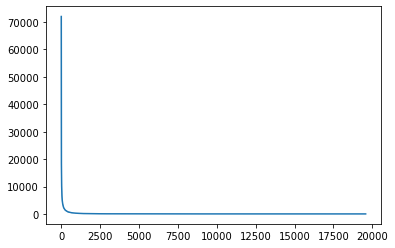

In [17]:
sns.lineplot(y=word_pos_dic.values(),x=list(sorted_dic.values()))

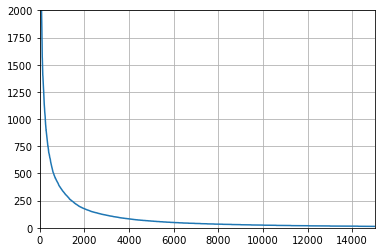

In [29]:
import matplotlib.pyplot as plt
plt.plot(word_pos_dic.values(), list(sorted_dic.values()))
plt.grid()
plt.ylim([0,2000])
plt.xlim([0, 15000])
plt.show()

# -------------------------------Creating 2d list--------------------------------------

### Initialising a 2d array of 20 rows for 20 groups and column size equal to the dic of words or vocab
plus one in dic size as 0th row has labels 
https://www.geeksforgeeks.org/python-using-2d-arrays-lists-the-right-way/

In [63]:
rows, cols = (21, len(sorted_dic.keys())+1)
arr = [[0]*cols]*rows
np.shape(arr)

(21, 88088)

In [58]:
k=0
for key in sorted_dic.keys() :
    arr[0][k] = key
    k+=1

### this function takes a file and the index of the group to which it belongs and it updates the freq of words in 2d array

In [74]:
def AddInto2DArray(file,i) :
    line = file.read()
    words = line.split()
    for word in words:
        if word in sorted_dic :
            arr[i][word_pos_dic[word]] = arr[i][word_pos_dic[word]] + 1 

    

### file handling and sending the group id along with file
group_id_dic below stores the id of each group in 2d array <br>
as first row means alt.atheism that is arr[0] = arr[alt.atheism]

In [75]:
groups = os.scandir('20_newsgroups/')
group_id_dic  = {}
k=1
for group in groups :
    documents = os.scandir(group)
    group_id_dic[os.path.basename(group)]=k
    for files in documents :
        file = open(doc,'r')
        AddInto2DArray(file,k)
    if(k>=1) :
        break
    k+=1

        
    

In [76]:
np.sum(arr)

777000

In [77]:
c=0
for i in arr[4] :
    if isinstance(i,str ):
        c+=1
c

0

In [86]:
y=[]
groups = os.scandir('20_newsgroups/')
for group in groups :
    y.append(os.path.basename(group))
y

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [98]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(arr,y)

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
np.shape(xtrain)

(15, 88088)

In [105]:
print(confusion_matrix(arr, y))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [101]:
print(classification_report(ytest, ypred))

                          precision    recall  f1-score   support

                               0.00      0.00      0.00       1.0
             alt.atheism       0.00      0.00      0.00       0.0
           comp.graphics       0.00      0.00      0.00       1.0
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       1.0
          comp.windows.x       0.00      0.00      0.00       1.0
         sci.electronics       0.00      0.00      0.00       1.0
      talk.religion.misc       0.00      0.00      0.00       1.0

                accuracy                           0.00       6.0
               macro avg       0.00      0.00      0.00       6.0
            weighted avg       0.00      0.00      0.00       6.0



D:\Anaconda_ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda_ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
